## Text Vectorization (count-based methods)

##### Adapted from Alex Sherman's NLP Practicum Materials 

In [1]:
from IPython.core.display import display, HTML
from IPython.display import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

- **tokenizing** strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

- **counting** the occurrences of tokens in each document.

- **normalizing** and weighting with diminishing importance tokens that occur in the majority of samples / documents.

Sources: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

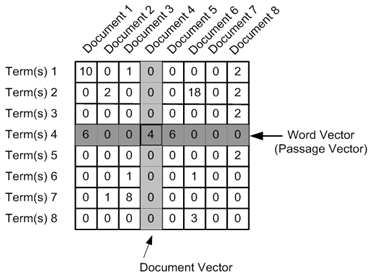

In [2]:
# Document and Word Vectors
Image("../images/word_vector.png", width=400, height=400)

In [2]:
# create a list of documents
text = ['This is the first document'
        , 'This is the second second document'
        , 'And the third one'
        , 'Is it the first document again']

### Step 1 - import from sklearn

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

### Step 2 - instantiate

In [4]:
# create an instance of countvectorizer
vect = CountVectorizer()

In [5]:
# when we print vect, we see its hyperparameters
print(vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


### Step 3 - fit 

In [6]:
# The vectorizer learns the vocabulary when we fit it with our documents. 
# This means it learns the distinct tokens (terms) in the text of the documents. 
# We can observe these with the method get_feature_names

vect.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [7]:
print('ORIGINAL_SENTENCES: \n {} \n'.format(text))
print('FEATURE_NAMES: \n {}'.format(vect.get_feature_names()))

ORIGINAL_SENTENCES: 
 ['This is the first document', 'This is the second second document', 'And the third one', 'Is it the first document again'] 

FEATURE_NAMES: 
 ['again', 'and', 'document', 'first', 'is', 'it', 'one', 'second', 'the', 'third', 'this']


### Step 4 - transform 

In [8]:
# Transform creates a sparse matrix, identifying the indices where terms are stores in each document
# This sparse matrix has 4 rows and 11 columns

vect.transform(text)

<4x11 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

### Sparsity

As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).

For instance a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

In [9]:
print(vect.transform(text))

  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 8)	1
  (0, 10)	1
  (1, 2)	1
  (1, 4)	1
  (1, 7)	2
  (1, 8)	1
  (1, 10)	1
  (2, 1)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1
  (3, 0)	1
  (3, 2)	1
  (3, 3)	1
  (3, 4)	1
  (3, 5)	1
  (3, 8)	1


In [10]:
sparse_matrix_url = 'https://op2.github.io/PyOP2/_images/csr.svg'
iframe = '<iframe src={} width=1000 height=200></iframe>'.format(sparse_matrix_url)
HTML(iframe)

C:\Users\grooney\Miniconda3\envs\mlg06\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [11]:
# This is easier to understand when we covert the sparse matrix into a dense matrix or pandas DataFrame
vect.transform(text).toarray()

array([[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]], dtype=int64)

In [12]:
import pandas as pd

# store the dense matrix
data = vect.transform(text).toarray()

# store the learned vocabulary
columns = vect.get_feature_names()

# combine the data and columns into a dataframe
pd.DataFrame(data, columns=columns)

,again,and,document,first,is,it,one,second,the,third,this
0,0,0,1,1,1,0,0,0,1,0,1
1,0,0,1,0,1,0,0,2,1,0,1
2,0,1,0,0,0,0,1,0,1,1,0
3,1,0,1,1,1,1,0,0,1,0,0


### Bag of Words

We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

A corpus of documents can thus be represented by a **matrix with one row per document and one column per token (e.g. word)** occurring in the corpus.

### fit_transform

- we can combine the training and transformation into a single method. This is a common process in the sklearn api, as we often want to learn something from a training data set and apply the results to testing or production data

In [13]:
vect = CountVectorizer()
vect.fit_transform(text)

<4x11 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

## Customize the Transformer

During the process of vectorizing the text, we can apply numerous transformations to modify the text and resulting vectors. 

### lowercase
- boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [14]:
# by instantiating CountVectorizer with differnt parameters, we can change the vocabulary
# lowercase determines if all words should be lowercase, setting it to False includes uppercase words

vect = CountVectorizer(lowercase=False)
vect.fit(text)
print(vect.get_feature_names())

['And', 'Is', 'This', 'again', 'document', 'first', 'is', 'it', 'one', 'second', 'the', 'third']


### stop_words

- string {‘english’}, list, or None (default)
 - If None, no stop words will be used. 
 - If ‘english’, a built-in stop word list for English is used.
 - If list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words 


In [15]:
# stops words determine if we should include common words (e.g. and, is, the) which show up in most documents
vect = CountVectorizer(stop_words='english')
vect.fit(text)
print(vect.get_feature_names())

['document', 'second']


In [16]:
# stops words determine if we should include common words (e.g. and, is, the) which show up in most documents
vect = CountVectorizer(stop_words=['first','second','third'])
vect.fit(text)
print(vect.get_feature_names())

['again', 'and', 'document', 'is', 'it', 'one', 'the', 'this']


### max_df
- float in range [0.0, 1.0] or int, default=1.0
- When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [17]:
vect = CountVectorizer(max_df=.5)
vect.fit(text)
print(vect.get_feature_names())

['again', 'and', 'first', 'it', 'one', 'second', 'third', 'this']


### ngram_range

- tuple (min_n, max_n)

- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [18]:
# max features determines the maximum number of features to display
vect = CountVectorizer(ngram_range=(2,2), max_features=5)
vect.fit(text)
print(vect.get_feature_names())

['and the', 'first document', 'is the', 'the first', 'this is']


### Limitations of the Bag of Words representation

A collection of unigrams (what bag of words is) cannot capture phrases and multi-word expressions, effectively disregarding any word order dependence. Additionally, the bag of words model doesn’t account for potential misspellings or word derivations.

N-grams to the rescue! Instead of building a simple collection of unigrams (n=1), one might prefer a collection of bigrams (n=2), where occurrences of pairs of consecutive words are counted.

One might alternatively consider a collection of character n-grams, a representation resilient against misspellings and derivations.

For example, let’s say we’re dealing with a corpus of two documents: ['words', 'wprds']. The second document contains a misspelling of the word ‘words’. A simple bag of words representation would consider these two as very distinct documents, differing in both of the two possible features. A character 2-gram representation, however, would find the documents matching in 4 out of 8 features, which may help the preferred classifier decide better:

# Attributes

In scikit-learn attributes are often provided to store information of the instance of the transformer or model. 

Many attributes are only available after the model is fit. For instance the learned vocabulary does not exist in Countvectorizer until text data has been provided with the fit method. Until the data is provided these attributes do not exist. The notation for these learned attributes is a trailing underscore after the attribute name (e.g. vocabulary_). 

In [19]:
vect = CountVectorizer(max_features=5)
vect.fit(text)
print(vect.get_feature_names())

['document', 'first', 'is', 'second', 'the']


### vocabulary_

- dict
- A mapping of terms to feature indices.

In [20]:
vect.vocabulary_

{'is': 2, 'the': 4, 'first': 1, 'document': 0, 'second': 3}

### Term-Frequency Problems

"The **main problem with the term-frequency approach is that it scales up frequent terms and scales down rare terms which are empirically more informative than the high frequency terms.**
The basic intuition is that a term that occurs frequently in many documents is not a good discriminator; the important question here is: why would you, in a classification problem for instance, emphasize a term which is almost present in the entire corpus of your documents ?

The tf-idf weight comes to solve this problem. **What tf-idf gives is how important is a word to a document**
in a collection, and that’s why tf-idf incorporates local and global parameters, because it takes in consideration not only the isolated term but also the term within the document collection. **What tf-idf then does to solve that problem, is to scale down the frequent terms while scaling up the rare terms; a term that occurs 10 times more than another isn’t 10 times more important than it, that’s why tf-idf uses the logarithmic scale to do that."**

Source: http://blog.christianperone.com/2011/10/machine-learning-text-feature-extraction-tf-idf-part-ii/

### TFIDF

In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.
Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency: 

- tf-idf(t,d) = tf(t,d) * idf(t)

In [21]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
text = ['I like math','I like statistics','I like beer']

In [28]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(text)
columns = tfidf_vect.get_feature_names()
pd.DataFrame(tfidf_vect.transform(text).toarray(), columns=columns)

,beer,like,math,statistics
0,0.000000,0.508542,0.861037,0.000000
1,0.000000,0.508542,0.000000,0.861037
2,0.861037,0.508542,0.000000,0.000000


### TFIDF Analysis
As we look at the tfidf score (which have a range of 0-1), high score occur for words that show up frequently in specific sentence but infrequenty overall. Low score occur in words that show up frequenty across all documents.

- **'Second' has a high score** as it shows up twice in document two and not in any other documents
- **'The' has a low score** as it show up in all documents

### Word2Vec
##### There are many things you can do to capture similarity:
- Query expansion with synonym dictionaries
- Separately learning word similarities from large corpora
- Encode similarity

##### Why do we need Word Embeddings?
"Many machine learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression etc. in broad terms. And with the huge amount of data that is present in the text format, it is imperative to extract knowledge out of it and build applications."

"So a natural language modelling technique like Word Embedding is used to map words or phrases from a vocabulary to a corresponding vector of real numbers. As well as being amenable to processing by ML algorithms, this vector representation has two important and advantageous properties:

- **Dimensionality Reduction** - it is a more efficient representation
- **Contextual Similarity** - it is a more expressive representation"


##### Techniques (Count versus Predictive)
Count-based methods compute the statistics of how often some word co-occurs with its neighbor words in a large text corpus, and then map these count-statistics down to a small, dense vector for each word. Predictive models directly try to predict a word from its neighbors in terms of learned small, dense embedding vectors (considered parameters of the model)."


##### Improvement over other methods 

Word embeddings are an improvement over simpler bag-of-word model word encoding schemes like word counts and frequencies that result in large and sparse vectors (mostly 0 values) that describe documents but not the meaning of the words.

Word embeddings work by using an algorithm to train a set of fixed-length dense and continuous-valued vectors based on a large corpus of text. Each word is represented by a point in the embedding space and these points are learned and moved around based on the words that surround the target word.

It is defining a word by the company that it keeps that allows the word embedding to learn something about the meaning of words. The vector space representation of the words provides a projection where words with similar meanings are locally clustered within the space.

The use of word embeddings over other text representations is one of the key methods that has led to breakthrough performance with deep neural networks on problems like machine translation.


SOURCE: 
- [An Intuitive Understanding of Word Embeddings: From Count Vectors to Word2Vec](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)
- [What is word embedding in deep learning?](https://www.quora.com/What-is-word-embedding-in-deep-learning)
- [Representations for Language: From Word Embeddings to Sentence Meanings
](https://nlp.stanford.edu/manning/talks/Simons-Institute-Manning-2017.pdf)
- [How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

In [29]:
from gensim.models import word2vec

df = pd.read_pickle('../data/hp_processed.pkl')

corpus = df.out_text.to_list()

# we need to pass splitted sentences to the model
tokenized_sentences = [sentence.split() for sentence in corpus]
tokenized_sentences[2369]

['harry',
 'shook_his_head',
 'violently',
 'to',
 'shut',
 'neville',
 'up',
 'but',
 'professor_mcgonagall',
 'had',
 'seen',
 'she',
 'looked',
 'more',
 'likely',
 'to',
 'breathe',
 'fire',
 'than',
 'norbert',
 'as',
 'she',
 'towered',
 'over',
 'the',
 'three',
 'of',
 'them']

### word2Vec Hyperparameters

- **size:** (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- **window:** (default 5) The maximum distance between a target word and words around the target word.
- **min_count:** (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- **workers:** (default 3) The number of cores to use while training.
- **sg:** (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

In [37]:
model = word2vec.Word2Vec(
      sentences=tokenized_sentences
    , size=100
    , window=5
    , min_count=10
    , sg=0
)

print(model)

Word2Vec(vocab=6711, size=100, alpha=0.025)


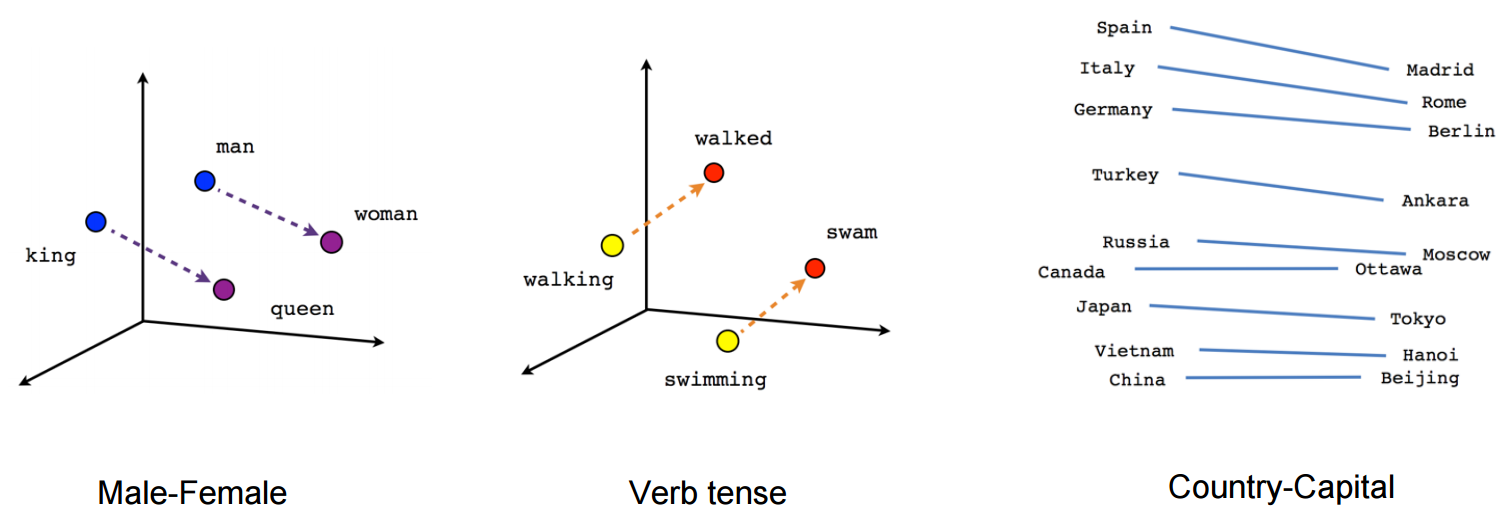

In [4]:
Image("../images/man_to_king_w2v.png", width=800)

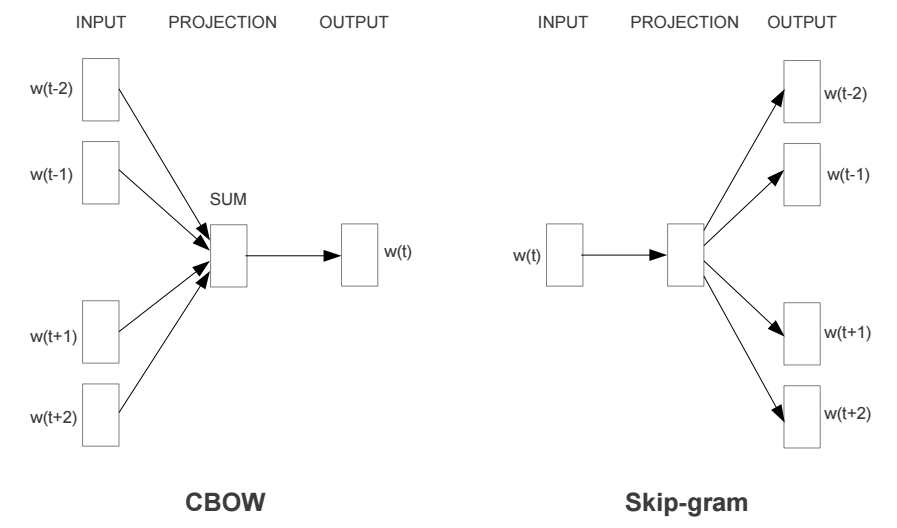

In [32]:
# Document and Word Vectors
Image("../images/word2vec_approaches.png", width=800)

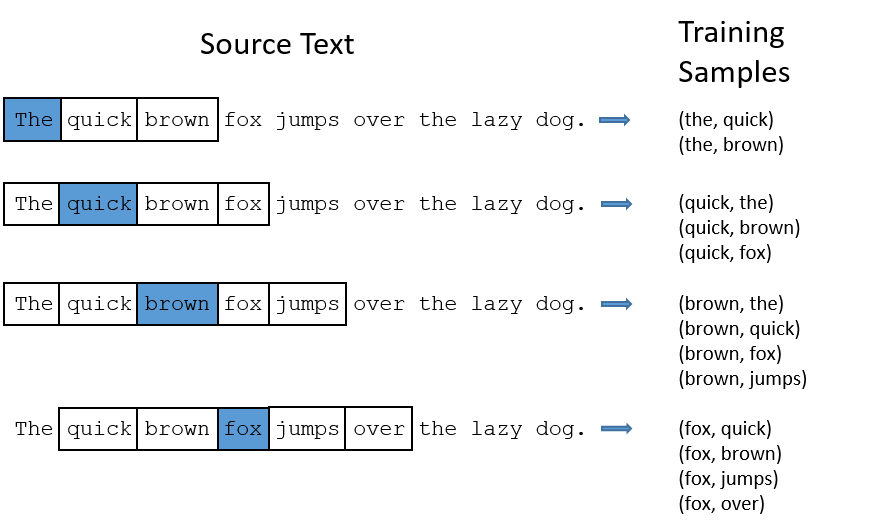

In [33]:
# Word2Vec Window
Image("../images/w2v_window.png", width=800)

### Cosine Similarity
##### Dot Product

"The dot product for two vectors of a and b where a_n and b_n are the components of the vector (features of the document, or TF-IDF values for each word of the document in our example)"

Imagine two documents:
- a = 'I like statistics'
- b = 'I like math'
- c = 'I like beer'

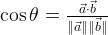

In [34]:
# cosine similarity equation
Image("../images/cosine_similarity.png", width=200)

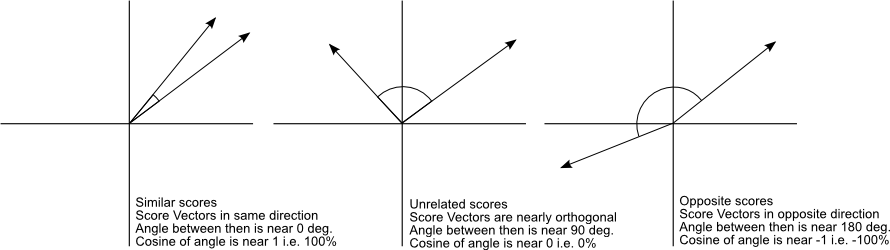

In [35]:
# cosine similarity angles
# 1 = perfect match
# 0 = dissimilar documents
Image("../images/cosine_similarity_angles.png", width=1200)

In [40]:
model.wv.most_similar('snape')

[('dumbledore', 0.8652175664901733),
 ('malfoy', 0.8466052412986755),
 ('sirius', 0.8353019952774048),
 ('slughorn', 0.8214535713195801),
 ('cedric', 0.8172875046730042),
 ('uncle_vernon', 0.811959981918335),
 ('dudley', 0.8015388250350952),
 ('moody', 0.7914752960205078),
 ('fudge', 0.7755624055862427),
 ('cho', 0.7741372585296631)]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_text = df.out_text.to_list()

vect = TfidfVectorizer(max_features = 100, stop_words='english')
transform_vec = vect.fit_transform(cleaned_text)
pd.DataFrame(transform_vec.toarray(), columns=vect.get_feature_names())

,asked,away,better,bit,black,came,come,course,dark,did,...,ve,ve_got,voice,voldemort,wand,want,wanted,way,weasley,went
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.541994,0.0,0.0,0.0,0.428018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.232426,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.260425,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38741,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
38742,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
38743,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
38744,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(transform_vec, dense_output= False)

In [44]:
print(df['text'][2369])
np.argmax(np.delete(cos_sim[2369,:].todense(),2369))

Harry shook his head violently to shut Neville up, but Professor McGonagall had seen. She looked more likely to breathe fire than Norbert as she towered over the three of them.


22971

In [46]:
print(df['text'][22972])

He dreamed that Neville and Professor Sprout were waltzing around the Room of Requirement while Professor McGonagall played the bagpipes. He watched them happily for a while, then de­cided to go and find the other members of the D.A. …


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_text = df.out_text.to_list()

vect = CountVectorizer(max_features = 100, stop_words='english')
transform_vec = vect.fit_transform(cleaned_text)
pd.DataFrame(transform_vec.toarray(), columns=vect.get_feature_names())

from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(transform_vec, dense_output= False)

print(df['text'][2369])
np.argmax(np.delete(cos_sim[2369,:].todense(),2369))

Harry shook his head violently to shut Neville up, but Professor McGonagall had seen. She looked more likely to breathe fire than Norbert as she towered over the three of them.


2131

In [49]:
print(df['text'][2132])

“Dumbledore again,” he said, “He was the first one I ever —”
